In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go


%reload_ext lab_black

In [3]:
cdc_df = pd.read_csv("./covid_data.csv", header=None).rename(
    columns={0: "date", 1: "wk37"}
)
cdc_df

,date,wk37
0,2/1/2020,0
1,2/8/2020,1
2,2/15/2020,0
3,2/22/2020,5
4,2/29/2020,10
5,3/7/2020,35
6,3/14/2020,55
7,3/21/2020,572
8,3/28/2020,3161
9,4/4/2020,10024


In [4]:
notional_df = pd.read_csv("./notional_data.csv", header=None).rename(
    columns={0: "date", 1: "wk37"}
)
notional_df

,date,wk37
0,2/1/2020,0
1,2/8/2020,1
2,2/15/2020,0
3,2/22/2020,5
4,2/29/2020,10
5,3/7/2020,35
6,3/14/2020,55
7,3/21/2020,572
8,3/28/2020,3161
9,4/4/2020,10024


In [5]:
known_deaths = cdc_df["wk37"].to_list()
n = len(known_deaths)

percent_reported = [0.1, 0.5, 0.8, 0.9]
while len(percent_reported) < n:
    percent_reported.append(1)

dict_data = {"week": list(range(1, n + 1)), "wk37": known_deaths}

for i in range(36, 0, -1):
    current_week = []
    for j, k in zip(range(i, 0, -1), range(0, i)):
        current_week.append(percent_reported[j] * known_deaths[k])

    while len(current_week) < n:
        current_week.append(None)

    dict_data.setdefault("wk{0}".format(i), current_week)

df = pd.DataFrame(dict_data, index=notional_df["date"])
df

,week,wk37,wk36,wk35,wk34,wk33,wk32,wk31,wk30,wk29,...,wk10,wk9,wk8,wk7,wk6,wk5,wk4,wk3,wk2,wk1
date,,,,,,,,,,,,,,,,,,,,,
2/1/2020,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/8/2020,2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.5,NaN
2/15/2020,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2/22/2020,4,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,4.5,4.0,2.5,NaN,NaN,NaN
2/29/2020,5,10,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,9.0,8.0,5.0,NaN,NaN,NaN,NaN
3/7/2020,6,35,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,35.0,35.0,31.5,28.0,17.5,NaN,NaN,NaN,NaN,NaN
3/14/2020,7,55,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,...,55.0,49.5,44.0,27.5,NaN,NaN,NaN,NaN,NaN,NaN
3/21/2020,8,572,572.0,572.0,572.0,572.0,572.0,572.0,572.0,572.0,...,514.8,457.6,286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/28/2020,9,3161,3161.0,3161.0,3161.0,3161.0,3161.0,3161.0,3161.0,3161.0,...,2528.8,1580.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


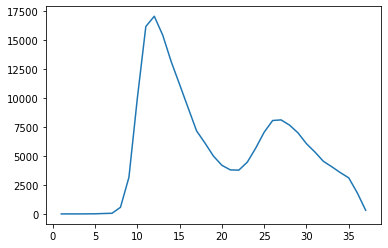

In [6]:
plt.plot(df["week"], df["wk37"])
plt.show()

In [16]:
fig_num = 1

for week_num in range(37, 0, -1):
    fig = go.Figure()

    fig.add_scattergl(x=df["week"], y=df[f"wk{week_num}"], line={"color": "red"})

    fig.add_scattergl(
        x=df["week"].where(
            df["week"] <= len(df[f"wk{week_num}"].dropna().to_list()) - 4
        ),
        y=df[f"wk{week_num}"],
        line={"color": "midnightblue"},
    )

    fig.update_layout(
        autosize=False,
        width=800,
        height=500,
        margin=dict(l=20, r=20, b=20, t=20, pad=4),
        paper_bgcolor="LightSteelBlue",
        showlegend=False,
        xaxis=dict(tickmode="array", tickvals=df["week"], ticktext=df.index),
    )

    fig.update_xaxes(title_text="Week")
    fig.update_yaxes(title_text="CDC Provisional Death Count")

    fig.write_image(f"images/fig{fig_num}.png")
    fig_num += 1